In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

### 비트연산 (and,or,xor,not)

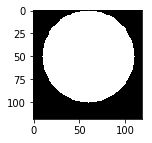

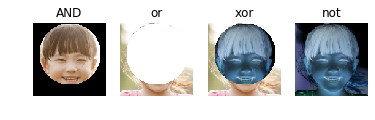

In [40]:
img = cv.imread('img/smile.png')

# 검은바탕 흰 원 생성
black = np.full((119,119,3),0,np.uint8)
cv.circle(black, (60,50), 50, (255,255,255),-1)
black_ = black.copy()

img_and = cv.bitwise_and(img,black,mask=None)
img_or = cv.bitwise_or(img,black,mask=None)
img_xor = cv.bitwise_xor(img,black,mask=None)
img_not = cv.bitwise_not(img,black,mask=None)

plt.figure(figsize=(2,2))
plt.imshow(cv.cvtColor(black_, cv.COLOR_BGR2RGB))
plt.show()

# and
plt.subplot(1,4,1)
plt.title('AND')
plt.imshow(cv.cvtColor(img_and, cv.COLOR_BGR2RGB))
plt.axis('off')
# or
plt.subplot(1,4,2)
plt.title('or')
plt.imshow(cv.cvtColor(img_or, cv.COLOR_BGR2RGB))
plt.axis('off')
# xor
plt.subplot(1,4,3)
plt.title('xor')
plt.imshow(cv.cvtColor(img_xor, cv.COLOR_BGR2RGB))
plt.axis('off')
# not
plt.subplot(1,4,4)
plt.title('not')
plt.imshow(cv.cvtColor(img_not, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 특정 색상 추출하기 (HSV)

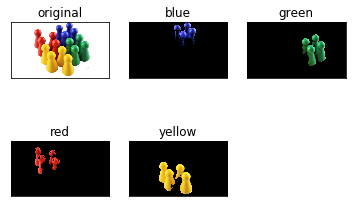

In [71]:
# HSV 로 파일 읽기
img = cv.imread("img/RGBY.jpg", cv.IMREAD_COLOR)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# 색상 영역
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 150,150])
red2 = np.array([10, 255,255])

yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# 색상 마스크, inRange : 범위안의 픽셀들을 마스크해줌
mask_blue = cv.inRange(hsv,blue1,blue2)
res_blue = cv.bitwise_and(img,img,mask=mask_blue)

mask_red1 = cv.inRange(hsv,red1,red2)
res_red1 = cv.bitwise_and(img,img,mask=mask_red1)

mask_green = cv.inRange(hsv,green1,green2)
res_green = cv.bitwise_and(img,img,mask=mask_green)

mask_yellow = cv.inRange(hsv,yellow1,yellow2)
res_yellow = cv.bitwise_and(img,img,mask=mask_yellow)

imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red1, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()

### 이미지 합성

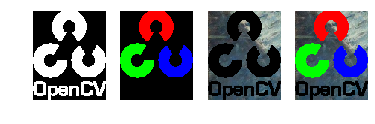

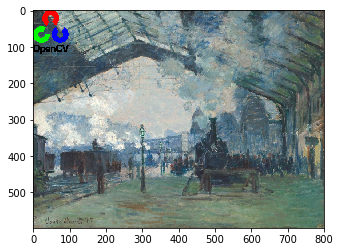

In [51]:
img_logo = cv.imread('img/opencv_logo.png', cv.IMREAD_UNCHANGED)
img_back = cv.imread('img/Train.jpg')

# 합성할 영역 roi 초기화
rows, cols, channels = img_logo.shape
roi = img_back[0:rows, 0:cols]

# 로고 전처리, 컬러 > 알파값 > 이진화 > not
_,logo_mask = cv.threshold(img_logo[:,:,3], 10, 255, cv.THRESH_BINARY)
logo_mask_ = cv.bitwise_not(logo_mask)

img_logo_m = cv.bitwise_and(img_logo, img_logo, mask=logo_mask)
img_back_m = cv.bitwise_and(roi, roi, mask=logo_mask_)
# 두 이미지를 같은 컬러스페이스로
img_logo_m = cv.cvtColor(img_logo_m,cv.COLOR_BGRA2BGR)

# 이미지 합성
dst = cv.add(img_logo_m, img_back_m)
img_back[0:rows, 0:cols] = dst

### 시각화 ###
# 알파값으로 이진화된 로고 생성
plt.subplot(141)
plt.imshow(cv.cvtColor(logo_mask, cv.COLOR_BGR2RGB))
plt.axis('off')
# 로고 마스킹
plt.subplot(142)
plt.imshow(cv.cvtColor(img_logo_m, cv.COLOR_BGR2RGB))
plt.axis('off')
# 합성
plt.subplot(143)
plt.imshow(cv.cvtColor(img_back_m, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(144)
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# 배경 사진에 합성
plt.imshow(cv.cvtColor(img_back, cv.COLOR_BGR2RGB))
plt.show()

- Sameless 함수 사용하여 이미지 합성 

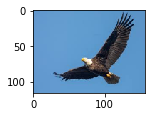

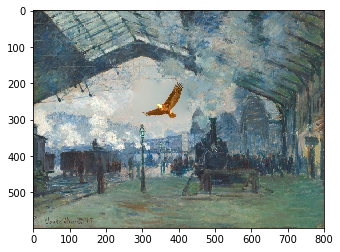

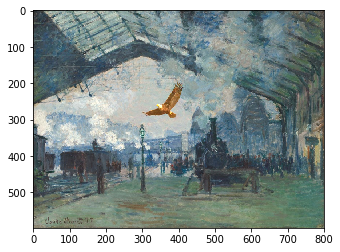

In [70]:
# Read images
src = cv.imread("img/eagel.jpg")
src = cv.resize(src,None,fx=0.6,fy=0.6)
dst = cv.imread("img/Train.jpg")
 
# This is where the CENTER of the airplane will be placed
center = (350,250)
 
# Clone seamlessly.
# 독수리만 지정한 마스크를 사용할시 더 좋은 결과 나올수있음.
output = cv.seamlessClone(src, dst, None, center, cv.NORMAL_CLONE)
mixed_clone = cv.seamlessClone(src, dst, None, center, cv.MIXED_CLONE)

# 배경 사진에 합성
plt.figure(figsize=(2,2))
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mixed_clone, cv.COLOR_BGR2RGB))
plt.show()

### 히스토그램
- 컬러히스토그램, 노멀라이즈

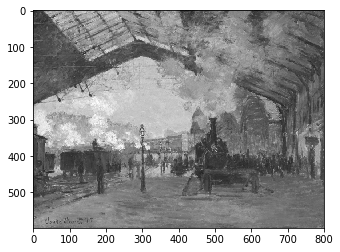

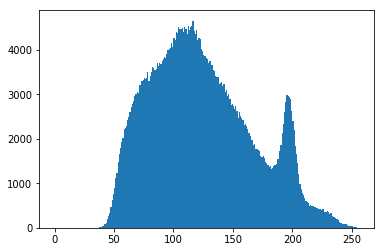

In [77]:
# 그레이스케일 히스토그램
img = cv.imread("img/Train.jpg",0)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));plt.show()
plt.hist(img.ravel(), 256, [0,256]);plt.show()

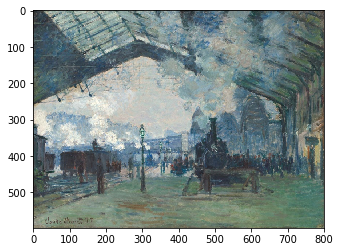

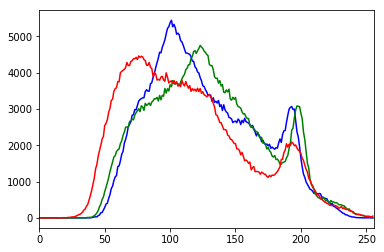

In [80]:
# 컬러 히스토그램
img = cv.imread("img/Train.jpg")
color = ('b','g','r')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));plt.show()
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

**Normalize**

cv.normalize(이미지, ?, 구간, 구간2, 플래그 상수)

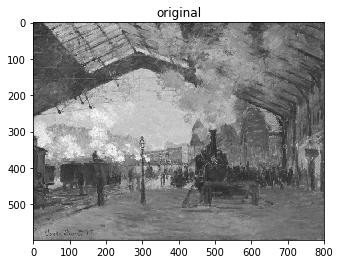

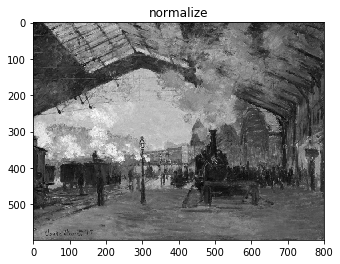

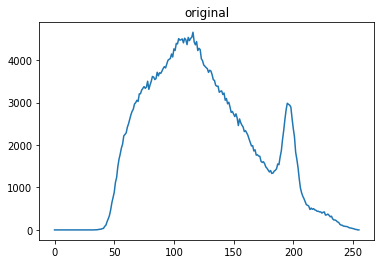

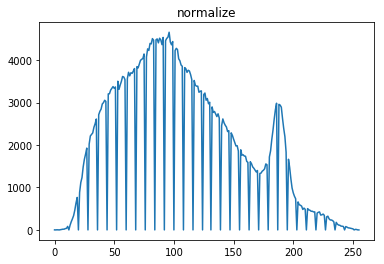

In [91]:
img = cv.imread("img/Train.jpg",0)
img_n = cv.normalize(img, None, 0, 255, cv.NORM_MINMAX)
# 정규화 이후 히스토그램 계산
hist = cv.calcHist([img], [0], None, [256], [0, 255])
hist_norm = cv.calcHist([img_n], [0], None, [256], [0, 255])

plt.title('original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));plt.show()
plt.title('normalize')
plt.imshow(cv.cvtColor(img_n, cv.COLOR_BGR2RGB));plt.show()
plt.title('original')
plt.plot(hist);plt.show()
plt.title('normalize')
plt.plot(hist_norm);plt.show()

**히스토그램 평활화**

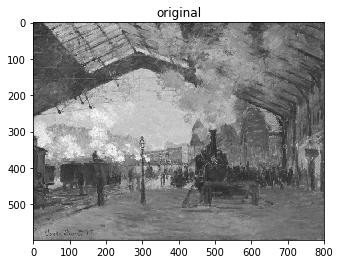

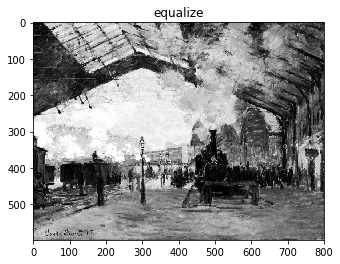

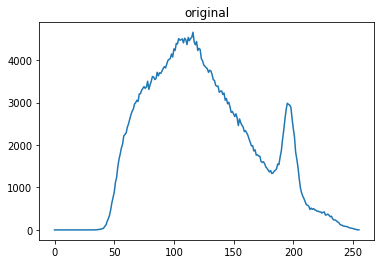

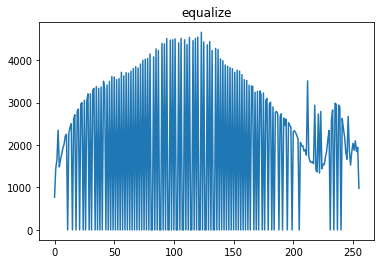

In [102]:
# 입력 받은 이미지를 불러옵니다.
img = cv.imread("img/Train.jpg",0)
# 평활화 적용
dst = cv.equalizeHist(img)

srcHist = cv.calcHist(images = [img],
                       channels = [0],
                       mask = None,
                       histSize = [256],
                       ranges = [0, 256])

dstHist = cv.calcHist(images = [dst],
                       channels = [0],
                       mask = None,
                       histSize = [256],
                       ranges = [0, 256])

plt.title('original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));plt.show()
plt.title('equalize')
plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB));plt.show()
plt.title('original');plt.plot(srcHist);plt.show()
plt.title('equalize');plt.plot(dstHist);plt.show()

**컬러 히스토그램 평활화**

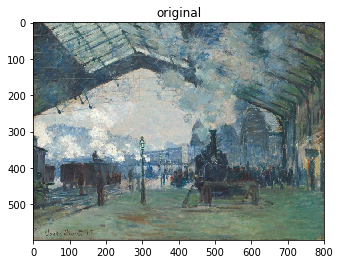

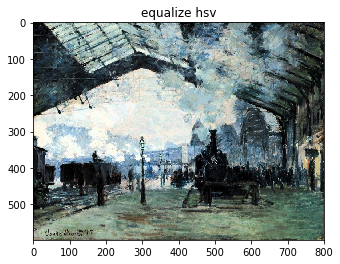

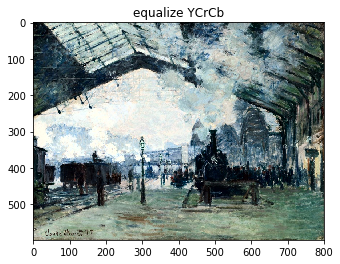

In [105]:
# 입력 받은 이미지를 불러옵니다.
img = cv.imread("img/Train.jpg")

########## HSV ###########
# hsv 컬러 형태로 변형합니다.
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# h, s, v로 컬러 영상을 분리 합니다. 
h, s, v = cv.split(hsv)

# v값 평활화
equal_v = cv.equalizeHist(v)
# h,s,equal_v merge
hsv2 = cv.merge([h,s,equal_v])
# hsv2 to BGR
hsvDst = cv.cvtColor(hsv2, cv.COLOR_HSV2BGR)

######## YCrCb ###########
# YCrCb 컬러 형태로 변환합니다.
yCrCb = cv.cvtColor(img, cv.COLOR_BGR2YCrCb)
# y, Cr, Cb 분리
y, Cr, Cb = cv.split(yCrCb)
# y값 평활화
equalizedY = cv.equalizeHist(y)
# merge
yCrCb2 = cv.merge([equalizedY, Cr, Cb])
# yCrCb2 to BGR
yCrCbDst = cv.cvtColor(yCrCb2, cv.COLOR_YCrCb2BGR)

# src, hsv, YCrCb 각각을 출력합니다.
plt.title('original')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));plt.show()
plt.title('equalize hsv')
plt.imshow(cv.cvtColor(hsvDst, cv.COLOR_BGR2RGB));plt.show()
plt.title('equalize YCrCb')
plt.imshow(cv.cvtColor(yCrCbDst, cv.COLOR_BGR2RGB));plt.show()